In [ ]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Dataset Loading

from google.colab import drive
drive.mount('/content/drive')
#Load the employee data into a pandas DataFrame
data=pd.read_csv('/content/drive/MyDrive/Dataset/sort-minRange.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.head()

,NORAD_CAT_ID_1,OBJECT_NAME_1,DSE_1,NORAD_CAT_ID_2,OBJECT_NAME_2,DSE_2,TCA,TCA_RANGE,TCA_RELATIVE_SPEED,MAX_PROB,DILUTION
0,55451,STARLINK-5656 [+],6.780,23608,ARIANE 40+3 R/B [-],6.545,2023-11-14 09:17:20.362,0.000,14.299,1.000000,0.000
1,57964,STARLINK-30396 [+],6.626,9819,COSMOS 886 DEB [-],6.740,2023-11-14 07:16:06.745,0.019,12.191,0.008441,0.007
2,46332,STARLINK-1721 [P],5.444,51050,MDASAT-1B [+],5.744,2023-11-12 22:12:11.137,0.022,14.731,0.033920,0.012
3,47523,FLOCK 4S-10 [+],1.780,56494,STARLINK-5530 [+],1.320,2023-11-08 21:41:15.038,0.036,10.471,0.001283,0.011
4,53137,STARLINK-4145 [+],1.044,36243,FENGYUN 1C DEB [-],3.274,2023-11-08 14:36:28.942,0.043,12.213,0.013920,0.016


In [ ]:
data.shape

(67507, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67507 entries, 0 to 67506
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NORAD_CAT_ID_1      67507 non-null  int64  
 1   OBJECT_NAME_1       67507 non-null  object 
 2   DSE_1               67507 non-null  float64
 3   NORAD_CAT_ID_2      67507 non-null  int64  
 4   OBJECT_NAME_2       67507 non-null  object 
 5   DSE_2               67507 non-null  float64
 6   TCA                 67507 non-null  object 
 7   TCA_RANGE           67507 non-null  float64
 8   TCA_RELATIVE_SPEED  67507 non-null  float64
 9   MAX_PROB            67507 non-null  float64
 10  DILUTION            67507 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 5.7+ MB


In [ ]:
data.isnull().sum()

NORAD_CAT_ID_1        0
OBJECT_NAME_1         0
DSE_1                 0
NORAD_CAT_ID_2        0
OBJECT_NAME_2         0
DSE_2                 0
TCA                   0
TCA_RANGE             0
TCA_RELATIVE_SPEED    0
MAX_PROB              0
DILUTION              0
dtype: int64

In [ ]:
#seperating operational status from the name of the satellite

data['Status'] = data['OBJECT_NAME_1'].str.extract(r'\[([+-P])\]')
data['Status1'] = data['OBJECT_NAME_2'].str.extract(r'\[([+-P])\]')
data['OBJECT_NAME_1'] = data['OBJECT_NAME_1'].str.replace(r'\[[+-P]\]', '')
data['OBJECT_NAME_2'] = data['OBJECT_NAME_2'].str.replace(r'\[[+-P]\]', '')

<ipython-input-327-9b1f3bf1810c>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data['OBJECT_NAME_1'] = data['OBJECT_NAME_1'].str.replace(r'\[[+-P]\]', '')
<ipython-input-327-9b1f3bf1810c>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  data['OBJECT_NAME_2'] = data['OBJECT_NAME_2'].str.replace(r'\[[+-P]\]', '')


In [ ]:
data.head()

,NORAD_CAT_ID_1,OBJECT_NAME_1,DSE_1,NORAD_CAT_ID_2,OBJECT_NAME_2,DSE_2,TCA,TCA_RANGE,TCA_RELATIVE_SPEED,MAX_PROB,DILUTION,Status,Status1
0,55451,STARLINK-5656,6.780,23608,ARIANE 40+3 R/B,6.545,2023-11-14 09:17:20.362,0.000,14.299,1.000000,0.000,+,-
1,57964,STARLINK-30396,6.626,9819,COSMOS 886 DEB,6.740,2023-11-14 07:16:06.745,0.019,12.191,0.008441,0.007,+,-
2,46332,STARLINK-1721,5.444,51050,MDASAT-1B,5.744,2023-11-12 22:12:11.137,0.022,14.731,0.033920,0.012,P,+
3,47523,FLOCK 4S-10,1.780,56494,STARLINK-5530,1.320,2023-11-08 21:41:15.038,0.036,10.471,0.001283,0.011,+,+
4,53137,STARLINK-4145,1.044,36243,FENGYUN 1C DEB,3.274,2023-11-08 14:36:28.942,0.043,12.213,0.013920,0.016,+,-


In [ ]:
#Most No of Operational Status of Object Name 1

data['Status'].value_counts()

+    65820
P     1474
B       79
Name: Status, dtype: int64

In [ ]:
#Most No of Operational Status of Object Name 2


data['Status1'].value_counts()

-    36579
+    27169
?     3273
P      483
Name: Status1, dtype: int64

In [ ]:
# Top 10 Satellite name with most conjunction from OBJECT_NAME_1

a=data['OBJECT_NAME_1'].value_counts()
a.head(10)

OBJECT C                164
OBJECT A                154
MOVE-II                 142
AAUSAT-II               140
OBJECT B                134
OBJECT D                128
NETSAT-2                127
SHIYAN 1 (SY-1)         126
LEMUR-2-JIN-LUEN        121
LEMUR-2-THENICKMOLO     121
Name: OBJECT_NAME_1, dtype: int64

In [ ]:
# Top 10 Satellite name with most conjunction from OBJECT_NAME_2

b=data['OBJECT_NAME_2'].value_counts()
b.head(10)

FENGYUN 1C DEB      5396
COSMOS 2251 DEB     3140
UNKNOWN             1073
DELTA 1 DEB         1044
CZ-6A DEB           1024
CZ-4B DEB           1023
PEGASUS DEB          902
IRIDIUM 33 DEB       895
PSLV DEB             877
SL-8 DEB             714
Name: OBJECT_NAME_2, dtype: int64

In [ ]:
#Total number of conjuction's happend on the day that are more than 1
from datetime import datetime
day=data['TCA'].value_counts()
for i,j in day.items():
  if j>1:
    dt_obj = datetime.strptime(i, "%Y-%m-%d %H:%M:%S.%f")
    date_only = dt_obj.date()
    date_str = date_only.strftime("%Y-%m-%d")
    print(date_str,j)

2023-11-09 6
2023-11-14 6
2023-11-13 6
2023-11-12 6
2023-11-10 6
2023-11-14 4
2023-11-10 2
2023-11-11 2
2023-11-09 2
2023-11-10 2
2023-11-09 2


In [ ]:
# No of Conjuction's Happened not more than 1

less=[]
for i,j in day.items():
  if j<=1:
    less.append(j)

print("No of Conjuction's Happened not more than 1 ",len(less))

No of Conjuction's Happened not more than 1  67463


In [ ]:
# No of Conjuction's Happened in every day of november

from datetime import datetime

date=pd.to_datetime(data['TCA'])

data['day']=date.dt.day

data['day'].value_counts()

14    9848
11    9726
10    9662
13    9635
9     9623
12    9548
8     9465
Name: day, dtype: int64

 **Active & Non-Active Satellite**


In [ ]:
object1=[data['OBJECT_NAME_1'][i] for i in range(len(data['Status'])) if data['Status'][i] in ['+', 'P', 'B']]
obj1=[data['OBJECT_NAME_1'][i] for i in range(len(data['Status'])) if data['Status'][i] not in ['+', 'P', 'B']]

In [ ]:
#Total No of Active & Non-Active satellite in Object_Name_1
print("No of Activite Satellite - ",len(object1))
print("No of Non-Active Satellite - ",len(obj1))

No of Activite Satellite -  67373
No of Non-Active Satellite -  134


In [ ]:
object2=[data['OBJECT_NAME_2'][i] for i in range(len(data['Status1'])) if data['Status1'][i] in ['+', 'P', 'B']]
obj2=[data['OBJECT_NAME_2'][i] for i in range(len(data['Status1'])) if data['Status1'][i] not in ['+', 'P', 'B']]

In [ ]:
#Total No of Active & Non-Active satellite in Object_Name_2

print("No of Activite Satellite - ",len(object2))
print("No of Non-Active Satellite - ",len(obj2))

No of Activite Satellite -  27652
No of Non-Active Satellite -  39855


In [ ]:
data.head()

,NORAD_CAT_ID_1,OBJECT_NAME_1,DSE_1,NORAD_CAT_ID_2,OBJECT_NAME_2,DSE_2,TCA,TCA_RANGE,TCA_RELATIVE_SPEED,MAX_PROB,DILUTION,Status,Status1,day
0,55451,STARLINK-5656,6.780,23608,ARIANE 40+3 R/B,6.545,2023-11-14 09:17:20.362,0.000,14.299,1.000000,0.000,+,-,14
1,57964,STARLINK-30396,6.626,9819,COSMOS 886 DEB,6.740,2023-11-14 07:16:06.745,0.019,12.191,0.008441,0.007,+,-,14
2,46332,STARLINK-1721,5.444,51050,MDASAT-1B,5.744,2023-11-12 22:12:11.137,0.022,14.731,0.033920,0.012,P,+,12
3,47523,FLOCK 4S-10,1.780,56494,STARLINK-5530,1.320,2023-11-08 21:41:15.038,0.036,10.471,0.001283,0.011,+,+,8
4,53137,STARLINK-4145,1.044,36243,FENGYUN 1C DEB,3.274,2023-11-08 14:36:28.942,0.043,12.213,0.013920,0.016,+,-,8


**Days Taken For Each Satellite To Conjuction From Start to Conjuction Date For Object_Name_1**

In [ ]:
data['DSE']=data['DSE_1'].astype(int)

data['DSE']=[round(i) for i in data['DSE']]

In [ ]:
data['conj_days']=data['day']-data['DSE']

In [ ]:
avg_day=data.groupby('OBJECT_NAME_1')['conj_days'].mean()

In [ ]:
name=[]
name1=[]
for i,j in avg_day.items():
  if j>=7:
    name.append(i)
  else:
    name1.append(i)

In [ ]:
print('No of Satellite having more than 7 days of conjuction - ',len(name))
print('No of Satellite having less than 7 days of conjuction - ',len(name1))

No of Satellite having more than 7 days of conjuction -  7651
No of Satellite having less than 7 days of conjuction -  42


Most of the satellite took in average of 7 days for the conjuction from the First epoch and to the conjuction day in the object_name_1

**Days Taken For Each Satellite To Conjuction From Start to Conjuction Date For Object_Name_2**

In [ ]:
data['DSE1']=data['DSE_2'].astype(int)

data['DSE1']=[round(i) for i in data['DSE1']]

In [ ]:
data['conj_days1']=data['day']-data['DSE1']

In [ ]:
avg_day1=data.groupby('OBJECT_NAME_2')['conj_days1'].mean()

In [ ]:
names=[]
names1=[]
for i,j in avg_day1.items():
  if j>=7:
    names.append(i)
  else:
    names1.append(i)

In [ ]:
print('No of Satellite having more than 7 days of conjuction - ',len(names))
print('No of Satellite having less than 7 days of conjuction - ',len(names1))

No of Satellite having more than 7 days of conjuction -  6646
No of Satellite having less than 7 days of conjuction -  101


In [ ]:
data['tca']=[round(i) for i in data['TCA_RELATIVE_SPEED']]

In [ ]:
# Count of each speed

data['tca'].value_counts()

15    15280
14    13593
13     7016
12     5023
11     4107
10     3647
9      3368
7      3287
6      3264
8      3190
5      1266
4      1222
3       999
2       922
0       668
1       618
16       34
17        3
Name: tca, dtype: int64

In [ ]:
#Max TCA_RELATIVE_SPEED of each satellite

avg_tca=data.groupby('OBJECT_NAME_1')['tca'].max()
a1=avg_tca.sort_values(ascending=False)

In [ ]:
# Top 10 Maximum speed of satellite

a1.head(10)

OBJECT_NAME_1
QSS (MOZI)         17
OBJECT D           17
SPACEBEE-7         17
STARLINK-30271     16
OBJECT AF          16
KSLV-II DUMMY      16
YUNYAO-1 05        16
STARLINK-5273      16
ION SCV-002        16
SPACEBEE-177       16
Name: tca, dtype: int64

In [ ]:
#satellite with maximum dillusion

dil=data.groupby('OBJECT_NAME_1')['DILUTION'].max()
dil1=dil.sort_values(ascending=False)

In [ ]:
dil1.head(10)

OBJECT_NAME_1
ELO-4            3.530
ONEWEB-0258      3.523
CHECKMATE 6      3.523
GAOFEN-12 01     3.523
HAWK-7C          3.522
WILDFIRE 10      3.520
WILDFIRE 5       3.518
ICEYE-X13        3.516
OTTER PUP        3.515
YUNHAI 3         3.513
Name: DILUTION, dtype: float64

In [ ]:
#satellite with minimum dillusion

dil2=dil.sort_values(ascending=True)

In [ ]:
dil2.head(10)

OBJECT_NAME_1
STARLINK-3314      0.106
ONEWEB-0229        0.143
ONEWEB-0228        0.177
STARLINK-30763     0.180
ONEWEB-0675        0.182
ONEWEB-0273        0.209
STARLINK-4159      0.211
STARLINK-30766     0.224
ONEWEB-0093        0.269
ONEWEB-0358        0.270
Name: DILUTION, dtype: float64

In [ ]:
#Dillusion count of the standard deviation

data['dil']=[round(i) for i in data['DILUTION']]

In [ ]:
data['dil'].value_counts()

1    36551
2    19605
3     5968
0     5359
4       24
Name: dil, dtype: int64

So the most of the dilusion comes under the 1 Standard deviation and least coms under 4 standard deviation.

In [ ]:
# Max range of Satellite with object_name_1

max=data.groupby('OBJECT_NAME_1')['TCA_RANGE'].max()
max1=max.sort_values(ascending=False)

In [ ]:
max1.head(10)

OBJECT_NAME_1
STARLINK-6219              5.000
ONEWEB-0287                5.000
MONITOR-4 (RS57S)          5.000
STARLINK-3160              5.000
LAPAN-A3                   5.000
YAOGAN-33 03               5.000
SITRO-AIS 11 (SHEFFER)     5.000
STARLINK-6030              5.000
STARLINK-3694              5.000
STARLINK-5231              4.999
Name: TCA_RANGE, dtype: float64

In [ ]:
# Max range of Satellite with object_name_1

maxx=data.groupby('OBJECT_NAME_2')['TCA_RANGE'].max()
maxx1=maxx.sort_values(ascending=False)

In [ ]:
maxx1.head(10)

OBJECT_NAME_2
NUSAT-33 (ALBANIA-2)      5.000
USA 16                    5.000
SL-14 DEB                 5.000
STARLINK-30511            5.000
STARLINK-6212             5.000
COSMOS 2535 DEB           5.000
PSLV DEB                  5.000
COSMOS 2251 DEB           5.000
SITRO-AIS 6 (CHIRKIN)     5.000
HAWK-6A                   4.999
Name: TCA_RANGE, dtype: float64

# **Conjuction Analysis**

In [ ]:
conjunction_data = data[data['NORAD_CAT_ID_1'] != data['NORAD_CAT_ID_2']]

In [ ]:
correlation_matrix = conjunction_data[['TCA_RANGE', 'TCA_RELATIVE_SPEED', 'MAX_PROB']].corr()

correlation_matrix

,TCA_RANGE,TCA_RELATIVE_SPEED,MAX_PROB
TCA_RANGE,1.000000,0.008030,-0.014451
TCA_RELATIVE_SPEED,0.008030,1.000000,0.002515
MAX_PROB,-0.014451,0.002515,1.000000


# **VISUALIZATION**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

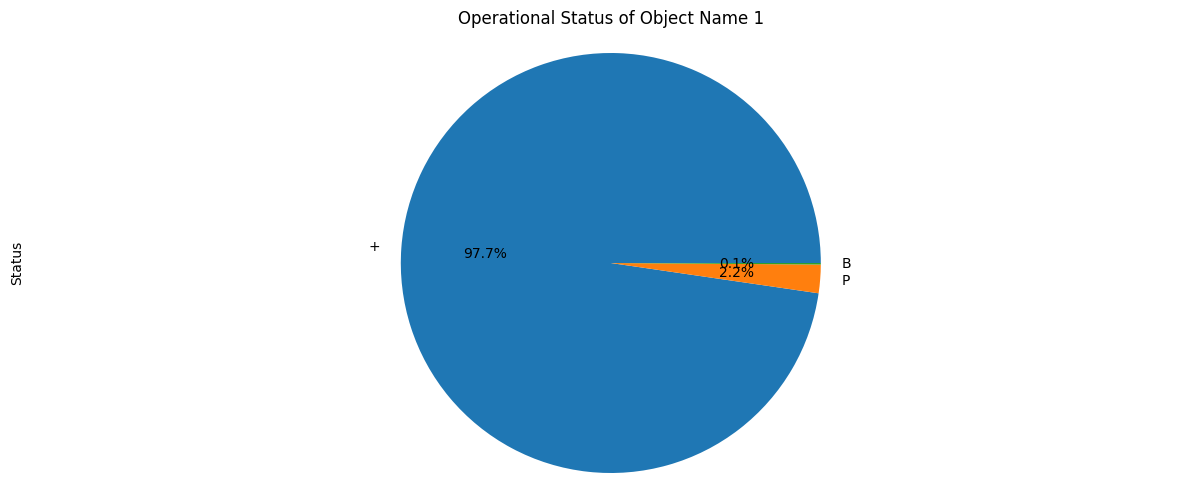

In [ ]:
plt.figure(figsize=(8, 8))
data['Status'].value_counts().plot(kind='pie',figsize=(15,6),autopct="%1.1f%%")
plt.axis('equal')
plt.title('Operational Status of Object Name 1')
plt.show()

Operational Status	Descriptions

(+)	Operational

(-)	Nonoperational

(P)	Partially Operational

(B)	Backup/Standby

(S)	Spare

(X)	Extended Mission

(D)	Decayed

(?)	Unknown

Active is any satellite with an operational status of +, P, B, S, or X.

Active status does not require power or communications



1) **Why did I pick the specific chart?**

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the dependant variable.

2) **What is/are the insight(s) found from the chart?**

From the above chart you can view the percentage holds of the Operational Status of RSO and I got to know that, there are total 67507 of Satellite in the Object_Name_1 and therefore the + holds the 97.7% and B holds 0.1% atlast P holds 2.2%.

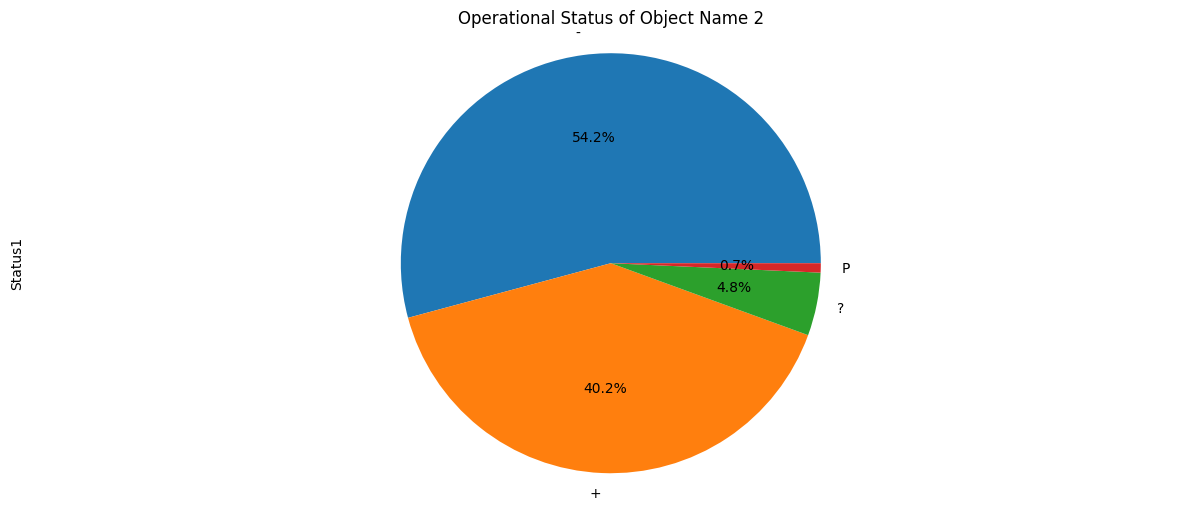

In [ ]:
plt.figure(figsize=(8, 8))
data['Status1'].value_counts().plot(kind='pie',figsize=(15,6),autopct="%1.1f%%")
plt.axis('equal')
plt.title('Operational Status of Object Name 2')
plt.show()

1) **Why did I pick the specific chart?**

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the dependant variable.

2) **What is/are the insight(s) found from the chart?**

From the above chart you can view the percentage holds of the Operational Status of RSO and I got to know that, there are total 67507 of Satellite in the Object_Name_1 and therefore the '-' holds the 54.2% and 'P' holds 0.7% and '?' holds 4.8% atlast '+' holds the 40.2%.

In [ ]:
a.head(10)

OBJECT C                164
OBJECT A                154
MOVE-II                 142
AAUSAT-II               140
OBJECT B                134
OBJECT D                128
NETSAT-2                127
SHIYAN 1 (SY-1)         126
LEMUR-2-JIN-LUEN        121
LEMUR-2-THENICKMOLO     121
Name: OBJECT_NAME_1, dtype: int64

Text(0.5, 1.0, 'Top 10 Satellite name OBJECT_NAME_1')

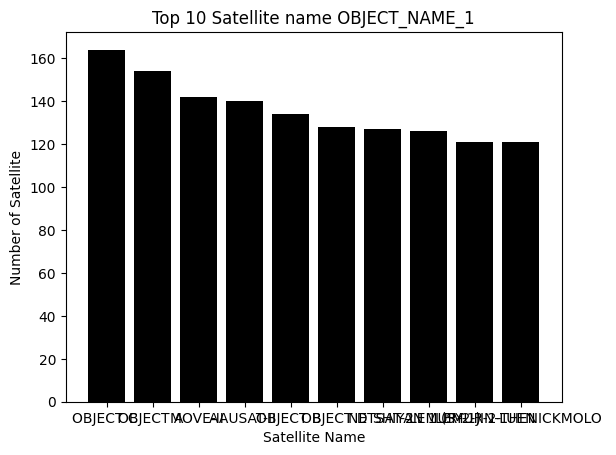

In [ ]:
# Top 10 Satellite name with most conjunction from OBJECT_NAME_1

top_a=a.head(10)

plt.bar(top_a.index,top_a.values,color='black')
plt.xlabel('Satellite Name')
plt.ylabel('Number of Satellite')
plt.title('Top 10 Satellite name OBJECT_NAME_1')

1) **Why did I pick the specific chart?**

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

2) **What is/are the insight(s) found from the chart?**

From The Above Chart you can find the Top 10 RSO with High number of Conjuctions of the Object_Name_1.

In [ ]:
b.head(10)

FENGYUN 1C DEB      5396
COSMOS 2251 DEB     3140
UNKNOWN             1073
DELTA 1 DEB         1044
CZ-6A DEB           1024
CZ-4B DEB           1023
PEGASUS DEB          902
IRIDIUM 33 DEB       895
PSLV DEB             877
SL-8 DEB             714
Name: OBJECT_NAME_2, dtype: int64

Text(0.5, 1.0, 'Top 10 Satellite name of OBJECT_NAME_2')

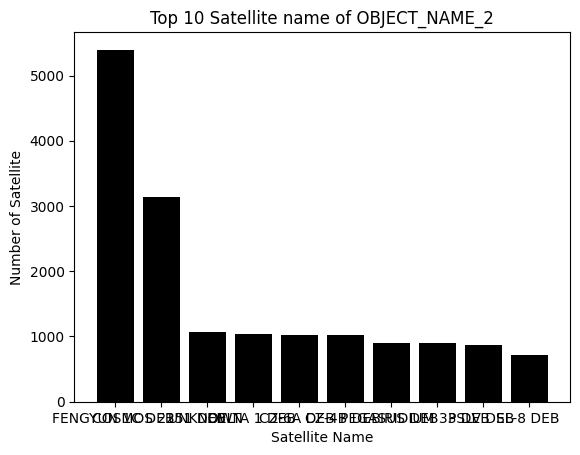

In [ ]:
# Top 10 Satellite name with most conjunction from OBJECT_NAME_2

top_b=b.head(10)

plt.bar(top_b.index,top_b.values,color='black')
plt.xlabel('Satellite Name')
plt.ylabel('Number of Satellite')
plt.title('Top 10 Satellite name of OBJECT_NAME_2')

1) **Why did I pick the specific chart?**

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

2) **What is/are the insight(s) found from the chart?**

From The Above Chart you can find the Top 10 RSO with High number of Conjuctions of the Object_Name_2.

In [ ]:
categories = ['Active Satellite', 'Non-Active Satellite']
counts = [len(object1), len(obj1)]

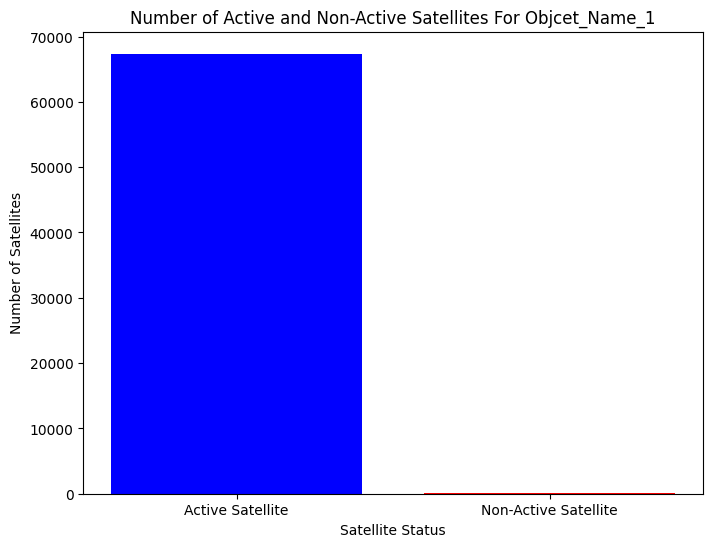

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['blue', 'red'])
plt.title('Number of Active and Non-Active Satellites For Objcet_Name_1')
plt.xlabel('Satellite Status')
plt.ylabel('Number of Satellites')
plt.show()

1) **Why did I pick the specific chart?**

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

2) **What is/are the insight(s) found from the chart?**

From the above chart you can view the No of Active & Non-Active Satellite of the Object_Name_1. The No of High Conjuctions satellite are the Active Satellite.

In [ ]:
categories1 = ['Active Satellite', 'Non-Active Satellite']
counts1 = [len(object2), len(obj2)]

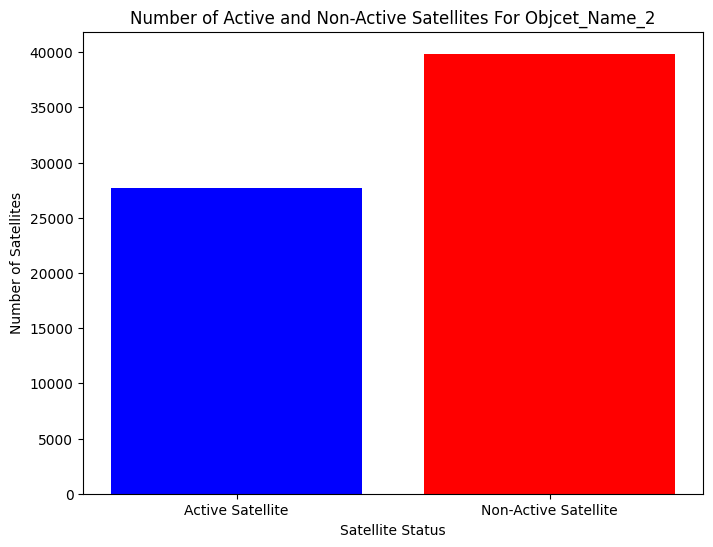

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(categories1, counts1, color=['blue', 'red'])
plt.title('Number of Active and Non-Active Satellites For Objcet_Name_2')
plt.xlabel('Satellite Status')
plt.ylabel('Number of Satellites')
plt.show()

1) **Why did I pick the specific chart?**

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

2) **What is/are the insight(s) found from the chart?**

From the above chart you can view the No of Active & Non-Active Satellite of the Object_Name_2. The No of High Conjuctions satellite are the Non-Active Satellite.

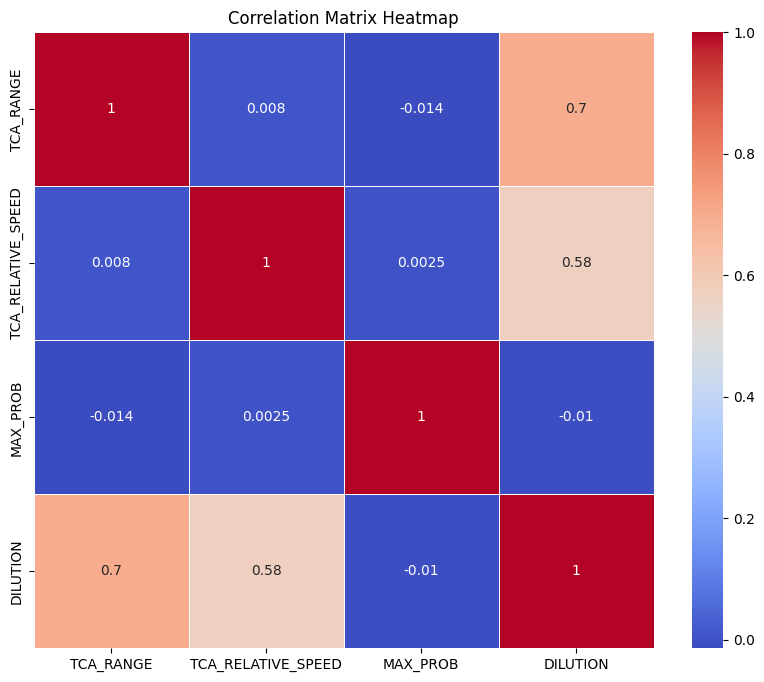

In [ ]:
numerical_fields = ['TCA_RANGE', 'TCA_RELATIVE_SPEED', 'MAX_PROB', 'DILUTION']

# Calculate the correlation matrix
correlation_matrix = data[numerical_fields].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

**Why did I pick the specific chart?**

A heatmap was chosen to visualize the correlation matrix between numerical fields. Heatmaps are effective for displaying the strength and direction of relationships between variables, making it easy to identify patterns and potential correlations in a visually intuitive manner.

**What is/are the insight(s) found from the chart?**

So From the above chart the TCA_RELATIVE_SPEED & DILUTION are correlated with 0.58 and TCA_RANGE & DILUTION are Correlated with 0.7 and other columns are not highly correlated.

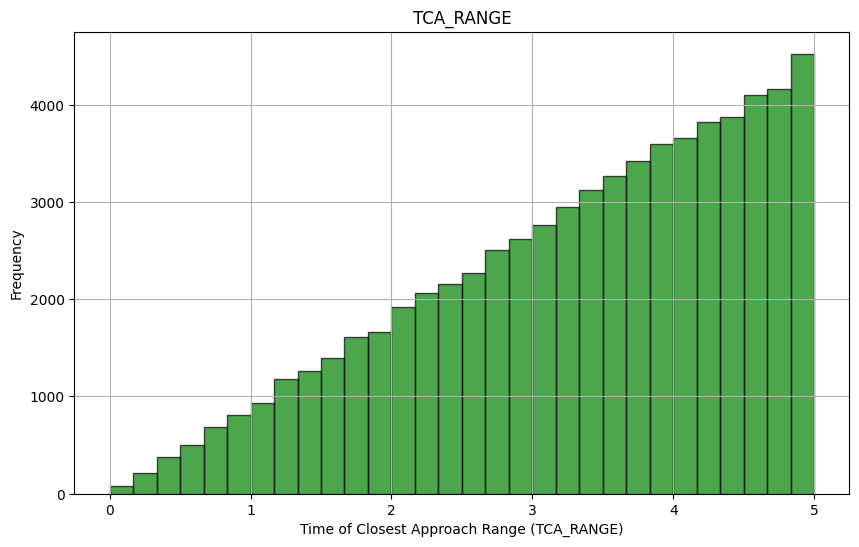

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data['TCA_RANGE'], bins=30, color='green', edgecolor='black', alpha=0.7)
plt.title('TCA_RANGE')
plt.xlabel('Time of Closest Approach Range (TCA_RANGE)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

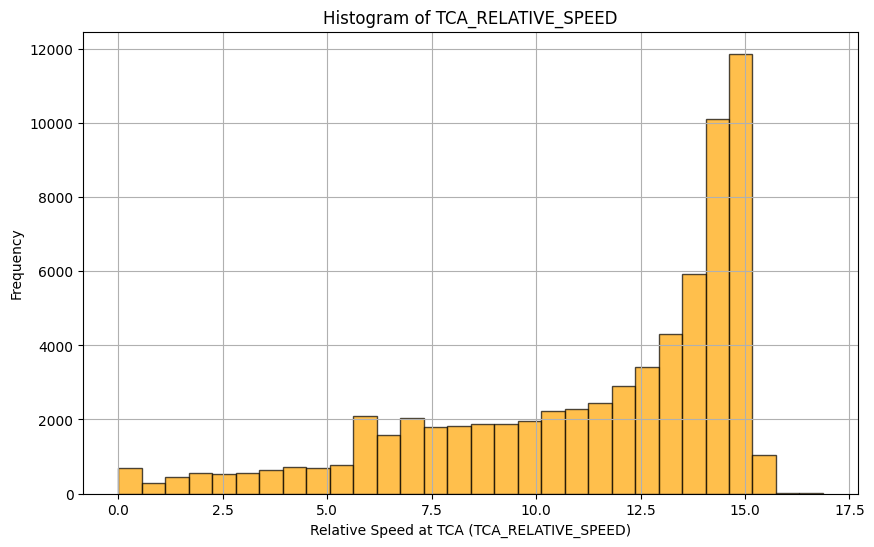

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data['TCA_RELATIVE_SPEED'], bins=30, color='orange', edgecolor='black', alpha=0.7)
plt.title('Histogram of TCA_RELATIVE_SPEED')
plt.xlabel('Relative Speed at TCA (TCA_RELATIVE_SPEED)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Why did I pick the specific chart?**

Histograms were selected to visualize the distributions of 'TCA_RANGE' and 'TCA_RELATIVE_SPEED' separately. Histograms provide a clear representation of the frequency or count of values within specified intervals, allowing for a detailed exploration of the data's distribution.

**What is/are the insight(s) found from the chart?**

Upon examining the histograms, it is evident that 'TCA_RANGE' follows a roughly normal distribution with a peak around a specific range, while 'TCA_RELATIVE_SPEED' exhibits a positively skewed distribution. The visualizations help identify the central tendencies, spread, and potential outliers in the datasets. Understanding these distributions is essential for making informed decisions about the characteristics of the variables and guiding further analysis or modeling efforts.

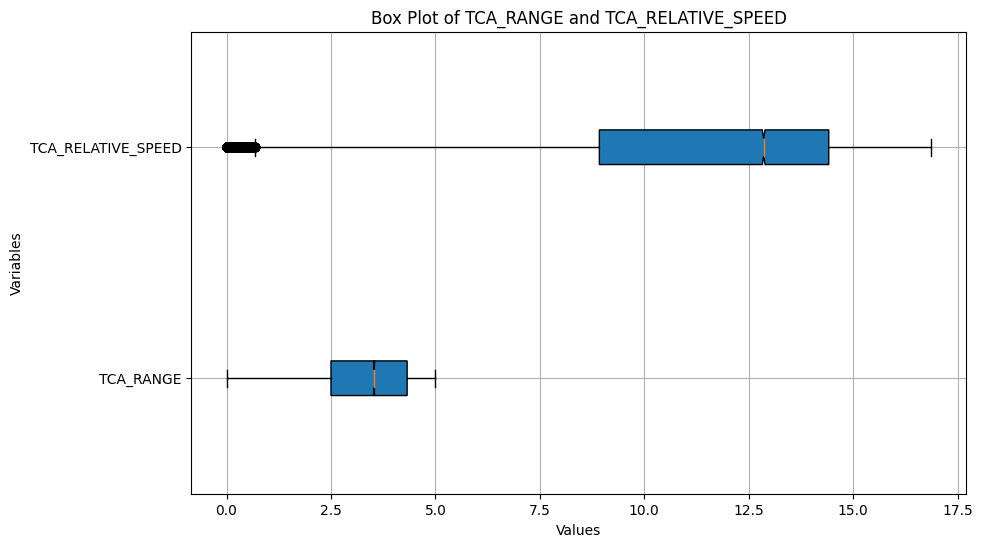

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot([data['TCA_RANGE'], data['TCA_RELATIVE_SPEED']], labels=['TCA_RANGE', 'TCA_RELATIVE_SPEED'], notch=True, vert=False, patch_artist=True)
plt.title('Box Plot of TCA_RANGE and TCA_RELATIVE_SPEED')
plt.xlabel('Values')
plt.ylabel('Variables')
plt.grid(True)
plt.show()

**Why did I pick the specific chart?**

A box plot was selected to effectively showcase the distribution of 'TCA_RANGE' and 'TCA_RELATIVE_SPEED' along with the identification of potential outliers. Box plots provide a concise summary of the data's central tendency, spread, and the presence of extreme values, aiding in the quick interpretation of distribution characteristics.

**What is/are the insight(s) found from the chart?**

Upon examining the box plot, it is evident that 'TCA_RANGE' exhibits a relatively wide distribution with potential outliers, while 'TCA_RELATIVE_SPEED' has a more concentrated distribution with fewer outliers. The box plot allows for a clear visualization of the median, quartiles, and potential extreme values in the datasets. Understanding these distribution characteristics is crucial for assessing the variability and potential impact of outliers in the variables of interest.

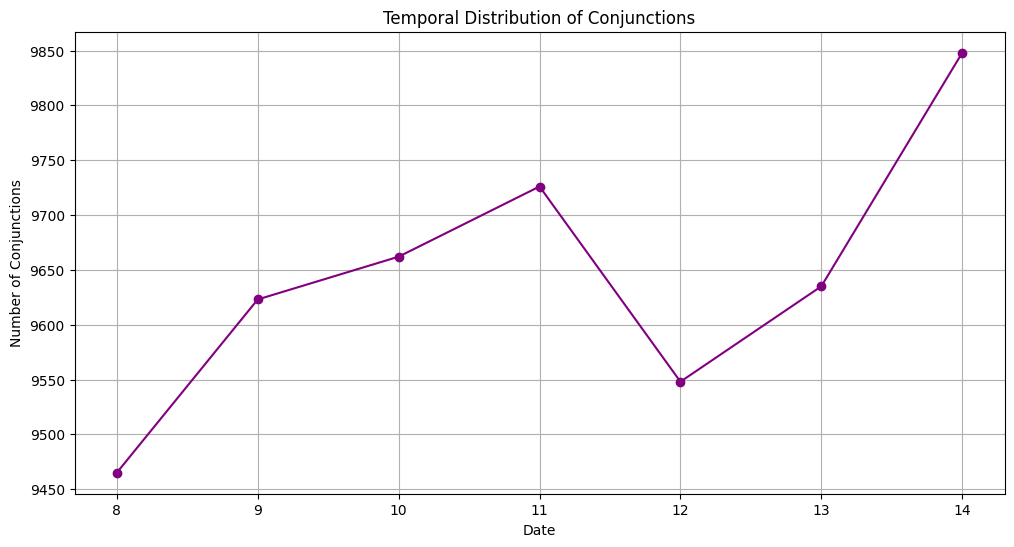

In [ ]:
conjunction_counts = data.groupby('day').size()

# Plotting the line chart
plt.figure(figsize=(12, 6))
plt.plot(conjunction_counts.index, conjunction_counts.values, marker='o', linestyle='-', color='purple')
plt.title('Temporal Distribution of Conjunctions')
plt.xlabel('Date')
plt.ylabel('Number of Conjunctions')
plt.grid(True)
plt.show()

**Why did I pick the specific chart?**

A line chart was chosen to visualize the temporal distribution of conjunctions over time. Line charts effectively illustrate trends, patterns, or seasonality in time-series data, making it easier to discern any temporal variations in conjunction occurrences.

**What is/are the insight(s) found from the chart?**

From examinig the above Line chart you can witness the count of conjuction's happend on the day of the november and the 14th of Nov have the highest conjuction count and 8th of Nov have low among the count of conjuctions.

## Conclussion

In conclusion, our analysis of the dataset pertaining to conjunctions in space has provided valuable insights into the dynamics of Resident Space Objects (RSOs) in Earth's orbit. Through the utilization of various data visualization techniques, we have gained a comprehensive understanding of the patterns, correlations, and distributions within the dataset.

The bar chart allowed us to discern the distribution of active and non-active satellites, shedding light on the prevalence of conjunction scenarios involving different satellite statuses. This insight is crucial for satellite operators in making informed decisions regarding collision risks.

The heatmap elucidated the correlation matrix between numerical fields, revealing noteworthy relationships. Notably, the heatmap highlighted correlations such as the moderate positive correlation between 'TCA_RELATIVE_SPEED' and 'DILUTION' (0.58), and the stronger positive correlation between 'TCA_RANGE' and 'DILUTION' (0.7). These correlations offer key insights for further investigation and may guide future analyses or predictive modeling efforts.

Histograms for 'TCA_RANGE' and 'TCA_RELATIVE_SPEED' allowed us to examine the distributions of these variables. 'TCA_RANGE' displayed a roughly normal distribution, while 'TCA_RELATIVE_SPEED' exhibited positive skewness. Understanding the distributions of these parameters is essential for characterizing the data and identifying potential outliers.

The line chart, showcasing the temporal distribution of conjunctions over days, uncovered discernible patterns and fluctuations. Peaks and troughs in conjunction occurrences may suggest temporal trends or seasonality, providing valuable information for satellite operators to anticipate and respond to variations over time.

Lastly, the box plot effectively illustrated the distributions of 'TCA_RANGE' and 'TCA_RELATIVE_SPEED,' highlighting the presence of potential outliers. This information is vital for assessing the variability and impact of extreme values on the dataset.

In summary, the diverse set of analyses conducted on the conjunction dataset equips us with a comprehensive understanding of the spatial dynamics and temporal patterns of RSOs. These insights are invaluable for satellite operators, space agencies, and analysts working towards enhancing the safety and efficiency of space operations.